# 可视化

在最后的这个notebook里，读入原始数据预测并可视化看一下预测结果与实际相比如何。同时也加载看一下自己从网络上随便找的数据如何。

### 加载数据

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# 定义 transform，包括缩放、中心裁剪、随机水平翻转、归一化
transform_train = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ]
)

# 只需要归一化和中心裁剪
transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# 加载 CIFAR10 数据集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


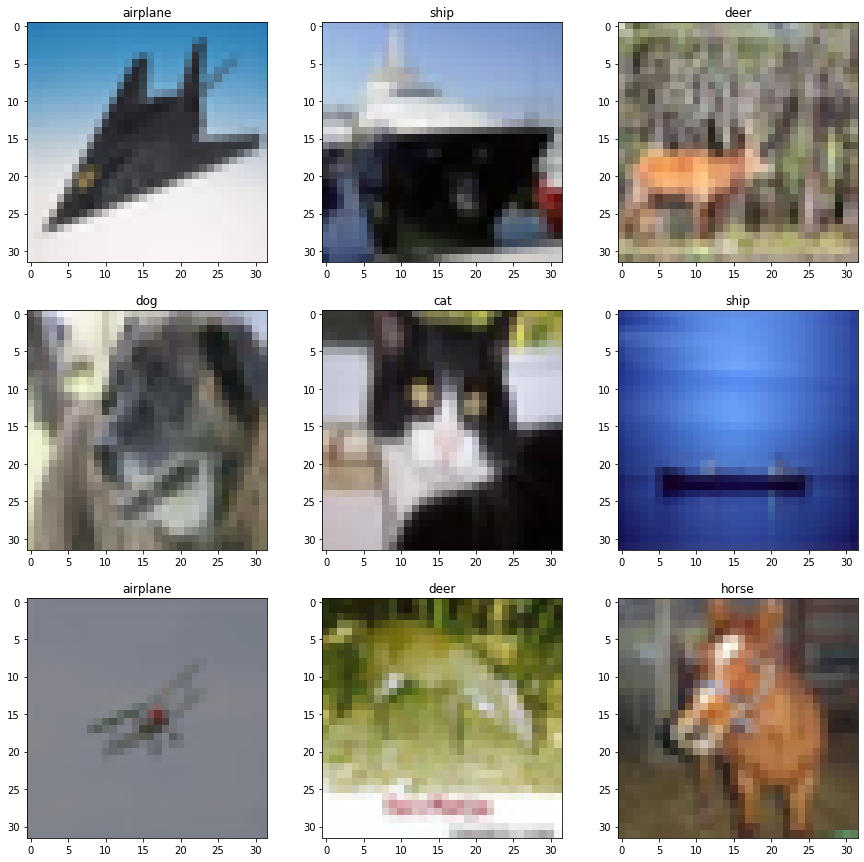

In [2]:
def display(dataset = trainset):
    # 展示一下数据集
    import matplotlib.pyplot as plt
    import numpy as np

    indexs = np.random.randint(0, len(dataset), 9)

    imgs = [dataset.data[i] for i in indexs]
    labels = [dataset.targets[i] for i in indexs]
    classes = dataset.classes

    fig = plt.figure(figsize=(15, 15))
    for i in range(9):
        ax = fig.add_subplot(3, 3, i+1)
        ax.imshow(imgs[i])
        ax.set_title(classes[labels[i]])

display()

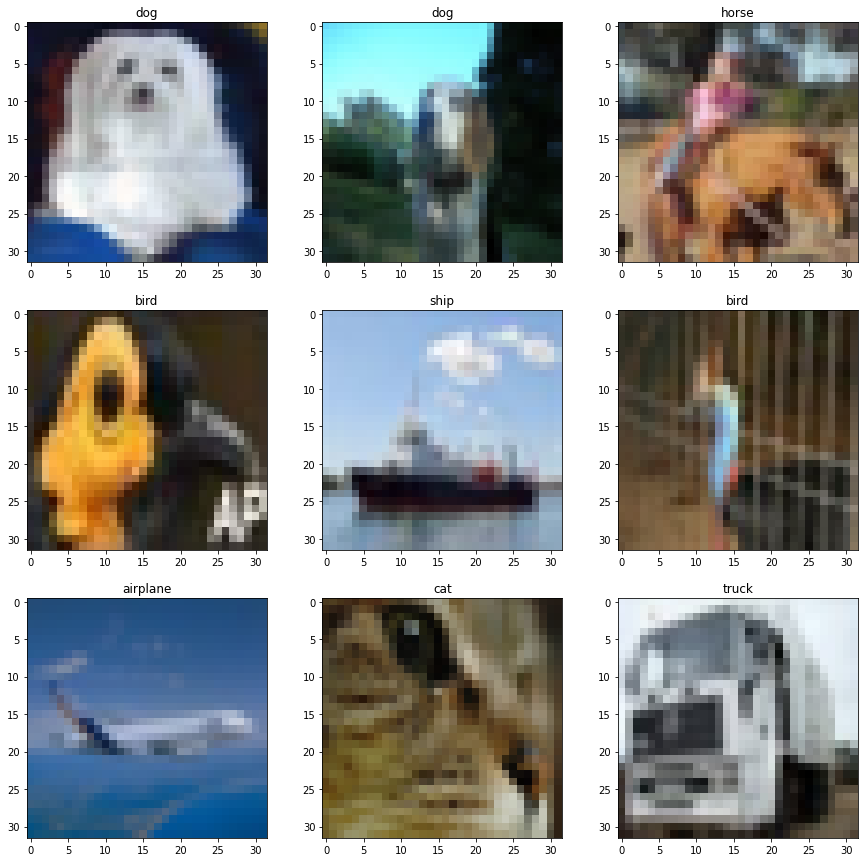

In [3]:
display(testset)

## 测试

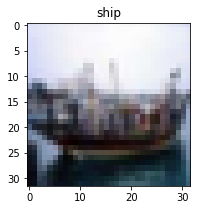

In [41]:
idx = 18
img = testset.data[idx]
label = testset.targets[idx]
classes = testset.classes

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.title(classes[label])
plt.show()

In [42]:
img.shape,img.dtype,img.max(),img.min()

((32, 32, 3), dtype('uint8'), 255, 0)

In [43]:
reversed_transform_test = transforms.Compose([
    transforms.Normalize(( - 0.485/0.229, - 0.456/0.224, - 0.406/0.225), (1/0.229, 1/0.224, 1/0.225)),
    transforms.ToPILImage(),
])

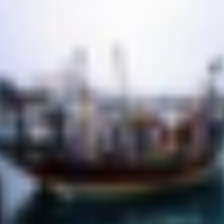

In [44]:
img_reversed = reversed_transform_test(testset[idx][0])
img_reversed

In [27]:
net = torch.load('data/vgg_cifar10.pth',map_location=torch.device('cpu'))

In [30]:
from torchinfo import summary
summary(net, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 10]                   --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         (1,792)
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         (36,928)
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        (73,856)
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        (147,584)
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]    

In [45]:
img_forNet = testset[idx][0]
img_label = testset[idx][1]

In [46]:
img_forNet.shape

torch.Size([3, 224, 224])

In [47]:
img_forNet.unsqueeze(0).shape #可以多添加一个维度

torch.Size([1, 3, 224, 224])

In [48]:
with torch.no_grad():
    out = net(img_forNet.unsqueeze(0))
    pred = torch.max(out,1)[1]
print("You predict {}th pic in testset is {} ".format(idx,testset.classes[pred.item()]))
print("And the true label of {}th pic in testset is {}".format(idx,testset.classes[img_label]))

You predict 18th pic in testset is ship 
And the true label of 18th pic in testset is ship


## 测试一下自己的数据

In [49]:
testset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

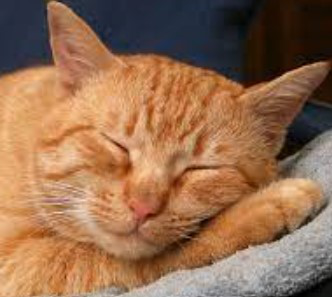

In [53]:
from PIL import Image

myimg = Image.open("myCatPicture.jpg")
myimg

In [54]:
myimg.size, myimg.mode, myimg.format, myimg.getpixel((0, 0))

((332, 297), 'RGB', 'JPEG', (40, 47, 66))

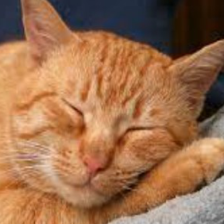

In [59]:
transform_resize_crop = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop((224, 224)),
    # transforms.ToTensor(),
    # transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

transform_resize_crop(myimg)

In [60]:
transform_resize_crop_norm = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

testimg = transform_resize_crop_norm(myimg)

In [62]:
with torch.no_grad():
    out = net(testimg.unsqueeze(0))
    pred = torch.max(out,1)[1]
print("Your model predict the pic is {} ".format(testset.classes[pred.item()]))
print("And the true label of pic is cat!!!")

Your model predict the pic is cat 
And the true label of pic is cat!!!


> 在自己找的图片上同样可以识别出来，83%的准确率还是挺不错的。